In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Mini Projek (Linear Regression)

Mini projek ini merupakan prediksi tips yang akan didapatkan seorang barista menggunakan data 'Barista Tips'.
Pertama dilakukan pencarian kolom-kolom yang mungkin berkaitan dengan cara melakukan visualisasi scatterplot. Selanjutnya kolom-kolom yang berkaitan akan digunakan untuk memprediksi tips yang didapatkan. 

In [48]:
barista = pd.read_csv('Barista tips.csv')

In [54]:
# Melihat 5 baris pertama
barista.head()

,Tips,Day of Week,Hours Worked,Shift Start Time,Shift End Time,Dollar/Hour
0,63,Mon,8,7,15,7.875000
1,58,Tue,8,7,15,7.250000
2,28,Wed,6,10,16,4.666667
3,32,Thu,6,10,16,5.333333
4,34,Fri,7,9,16,4.857143


In [50]:
# Melihat jenis data dari setiap kolom
barista.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tips              49 non-null     int64  
 1   Day of Week       49 non-null     object 
 2   Hours Worked      49 non-null     int64  
 3   Shift Start Time  49 non-null     int64  
 4   Shift End Time    49 non-null     int64  
 5   Dollar/Hour       49 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.4+ KB


Terdapat kolom-kolom yaitu : 
- 1 kolom float ('Dollar/Hour')
- 4 kolom integer ('Tips','Shift Start Time','Shift End Time')
- 1 kolom objek ('Day of Week')

Kolom yang akan diprediksi adalah 'Tips'

## Simple EDA

<Axes: xlabel='Dollar/Hour', ylabel='Tips'>

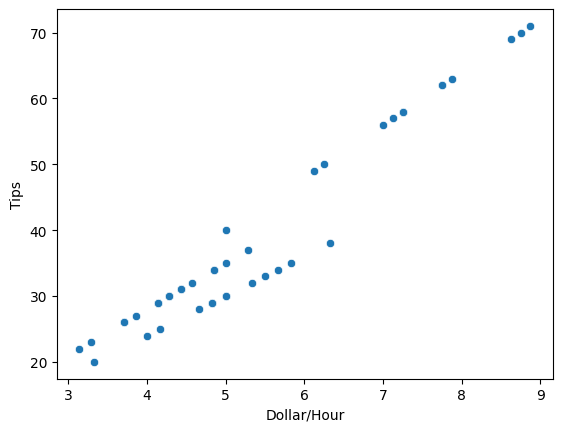

In [64]:
# Melihat relasi antara Dollar/Hour vs Tips dengan scatterplot
sns.scatterplot(data = barista, x = 'Dollar/Hour',y='Tips')

Terdapat hubungan positif antara 'Dollar/Hour' dan 'Tips' sehingga 'Dollar/Hour' dapat dipakai untuk melakukan prediksi

<Axes: xlabel='Hours Worked', ylabel='Tips'>

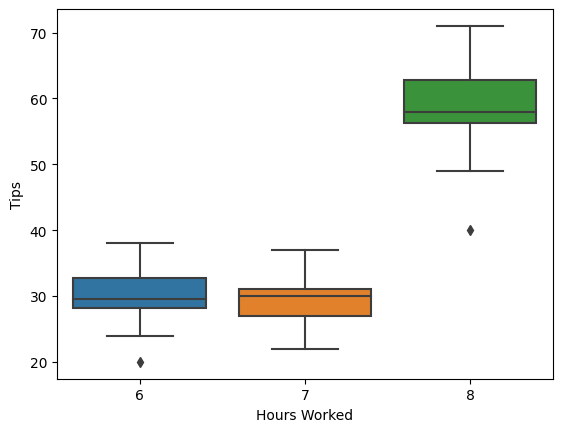

In [63]:
# Melihat distribusi dan outlier dari Hours worked vs tips dengan boxplot
sns.boxplot(data = barista, x = 'Hours Worked',y='Tips')

Distribusi data terlihat merata ketika di filter berdasarkan 'Hours Worked'. Terdapat 1 outlier batas bawah pada 6 jam kerja dan 8 jam kerja untuk masing-masing jam.

## Prediction

In [53]:
# Melakukan prediksi tips dengan regresi linear 
reg1 = sm.OLS(barista['Tips'], sm.add_constant(barista[['Dollar/Hour','Hours Worked']]))
print(reg1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   Tips   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     9748.
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           3.56e-61
Time:                        13:22:23   Log-Likelihood:                -51.629
No. Observations:                  49   AIC:                             109.3
Df Residuals:                      46   BIC:                             114.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -40.9150      0.987    -41.458   

R-squared bernilai 0.998 yang berarti x1, x2 memiliki pengaruh terhadap target (y) yang besar yaitu 99.8%. Selain itu Prob (F-Statistic) bernilai dibawah <0.05 yang berarti Tolak H0 (Ambil H1 yaitu berpengaruh signifikan). 
Selanjutnya dapat dilihat hasil t-test dari setiap x1,x2,y. Hasil ketiganya dibawah 0.05 yang berarti berpengaruh signifikan sehingga dapat dimasukkan ke dalam persamaan koefisien bersama x1,x2, y.

Persamaan tersebut yaitu 
y = -40.9150+(7.4746\*X1)+(5.5817\*X2)

In [66]:
def model(x1,x2):
    Y = -40.9150 +(7.4746*x1)+(5.5817*x2)
    return Y

print(model(8,7))

57.9537


Hasil prediksi ini menunjukkan jika seorang barista bekerja 7 jam ('Hours worked') dan diberi upah $ 8/jamnya ('Dollar/Hour') maka tips yang akan ia dapatkan sebesar 57.9537